In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import skimage

plt.style.use('seaborn-whitegrid')

%matplotlib inline

## Estudo dirigido 1
## Piscar o olho direito da imagem "olhos.jpg" 5 vezes

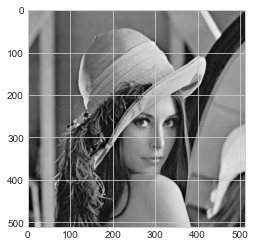

In [2]:
img = cv.imread("data/lena.png")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

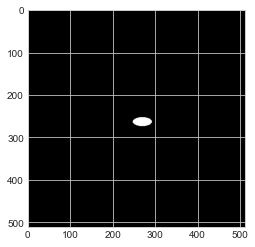

In [3]:
# left_eye = img[253:275,246:288]
# cheek = img[300:320,250:285]
#extracting the eye
#elipse mask
mask = np.zeros(img.shape, np.uint8)
cv.ellipse(mask, (268, 264), (22, 10), 0, 0, 360, 255, -1)
#mask and original image
masked_img = cv.bitwise_and(img, img, mask=mask)
masked_img[masked_img > 0] = 1
plt.imshow(masked_img, cmap="gray")

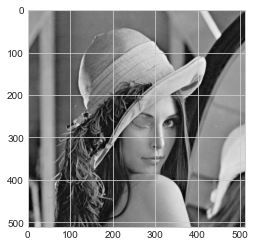

In [4]:
#translate to get the color
M = np.float32([[1, 0, 0], [0, 1, -100]])
translate = cv.warpAffine(img, M, (img.shape[1], img.shape[0]))
r, c = np.where(masked_img == 1)
#reaplacing the color in the eye
final = img.copy()
final[r, c] = translate[r, c]
#mix final and img
plt.imshow(final, cmap="gray")

In [5]:
#make gif with the eye blinking 5 times
import imageio
images = [img, final]
imageio.mimsave('outputs/eye.gif', images, duration=0.9)

## Estudo dirigido 2
## histogramas

In [6]:
sign = cv.imread("data/castle_sign.png")
sign = cv.cvtColor(sign, cv.COLOR_BGR2GRAY)

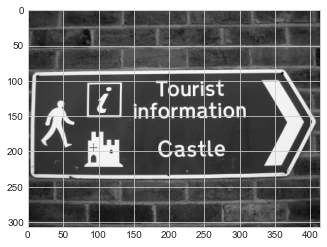

In [7]:
plt.imshow(sign, cmap="gray")

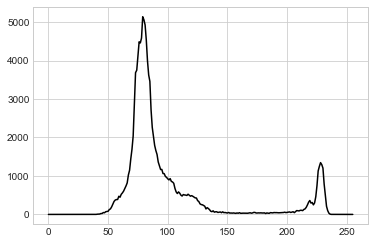

In [8]:
#histogram values 0-256 for the sign
hist = cv.calcHist([sign], [0], None, [256], [0, 256])
#plot in graph in logarithmic scale
plt.plot(hist, color="black")

In [9]:
#quantity of pixels with the higher intensity and his value
M = hist.max()
T = np.argwhere(hist == M)[0][0]

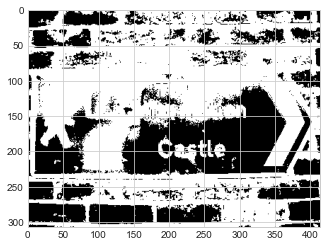

In [11]:
#thresholding
ret, thresh = cv.threshold(sign, T, 255, cv.THRESH_BINARY)
cv.imwrite("outputs/castle_sign.png", thresh)
plt.imshow(thresh, cmap="gray")

## Estudo dirigido 3
## Sobel Kernel

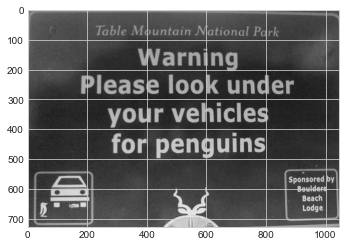

In [42]:
penguin = cv.imread("data/penguins.png")
penguin = cv.cvtColor(penguin, cv.COLOR_BGR2GRAY)
plt.imshow(penguin, cmap="gray")

In [43]:
v_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [44]:
v_edges = cv.filter2D(penguin, -1, v_kernel)
h_edges = cv.filter2D(penguin, -1, h_kernel)
vh_edges = cv.filter2D(penguin, -1, v_kernel + h_kernel)
cv.imwrite("outputs/penguin_v_edges.png", v_edges)
cv.imwrite("outputs/penguin_h_edges.png", h_edges)
cv.imwrite("outputs/penguin_vh_edges1.png", vh_edges)

True

Text(0.5, 1.0, 'Vertical and horizontal edges')

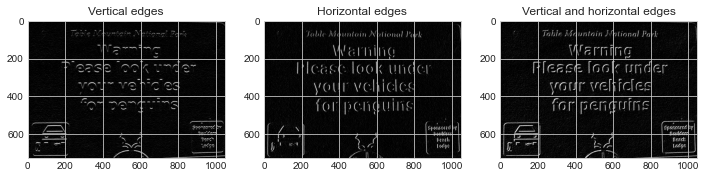

In [45]:
edges = plt.subplots(1, 3, figsize=(12, 5))
edges[1][0].imshow(v_edges, cmap="gray")
edges[1][0].set_title("Vertical edges")
edges[1][1].imshow(h_edges, cmap="gray")
edges[1][1].set_title("Horizontal edges")
edges[1][2].imshow(vh_edges, cmap="gray")
edges[1][2].set_title("Vertical and horizontal edges")

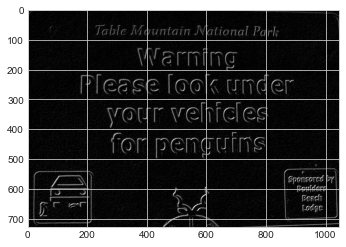

In [46]:
#i = sqrt(iu^2 + iv^2)
vh_edges2 = cv.addWeighted(v_edges, 0.5, h_edges, 0.5, 0)
cv.imwrite("outputs/penguin_vh_edges2.png", vh_edges2)
plt.imshow(vh_edges2, cmap="gray")

## Estudo dirigido 4
## Processamento monadico

Text(0.5, 1.0, 'lena double')

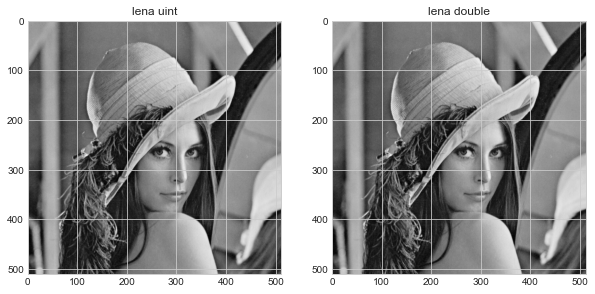

In [144]:
def get_images():
    lena = cv.imread("data/lena.png")
    lena_int = cv.cvtColor(lena, cv.COLOR_BGR2GRAY)
    lena_double = skimage.img_as_float(lena_int)
    return lena_int, lena_double

lena_int, lena_double = get_images()
lenas = plt.subplots(1, 2, figsize=(10, 5))
lenas[1][0].imshow(lena_int, cmap="gray")
lenas[1][0].set_title("lena uint")
lenas[1][1].imshow(lena_double, cmap="gray")
lenas[1][1].set_title("lena double")


In [145]:
lena_int.dtype, lena_double.dtype

(dtype('uint8'), dtype('float64'))

Text(0.5, 1.0, 'lena double brightness')

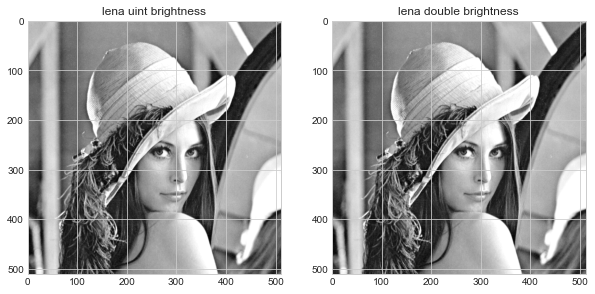

In [146]:
lena_int, lena_double = get_images()

#brightness on lena int and double
lena_int = cv.add(lena_int, 50)
lena_double = cv.add(lena_double, 0.2)
lena_double[lena_double > 1] = 1

cv.imwrite("outputs/lena_brightness.png", lena_int)

lenas = plt.subplots(1, 2, figsize=(10, 5))
lenas[1][0].imshow(lena_int, cmap="gray")
lenas[1][0].set_title("lena uint brightness")
lenas[1][1].imshow(lena_double, cmap="gray")
lenas[1][1].set_title("lena double brightness")

Text(0.5, 1.0, 'lena double contrast')

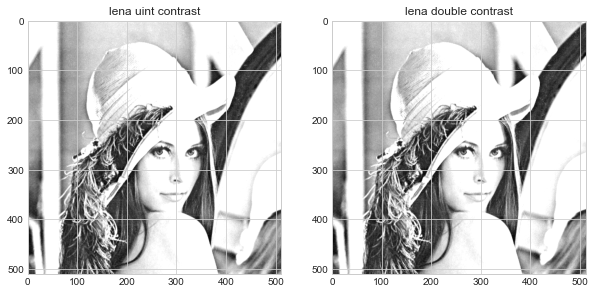

In [150]:
lena_int, lena_double = get_images()

#contrast on lena int and double
#lena_int = lena_int * 1.8
lena_int = cv.multiply(lena_int, 1.8)
#lena_int[lena_int > 255] = 255

#lena_double = lena_double * 1.8
lena_double = cv.multiply(lena_double, 1.8)
lena_double[lena_double > 1] = 1

cv.imwrite("outputs/lena_contrast.png", lena_int)

lenas = plt.subplots(1, 2, figsize=(10, 5))
lenas[1][0].imshow(lena_int, cmap="gray")
lenas[1][0].set_title("lena uint contrast")
lenas[1][1].imshow(lena_double, cmap="gray")
lenas[1][1].set_title("lena double contrast")

Text(0.5, 1.0, 'lena double negative')

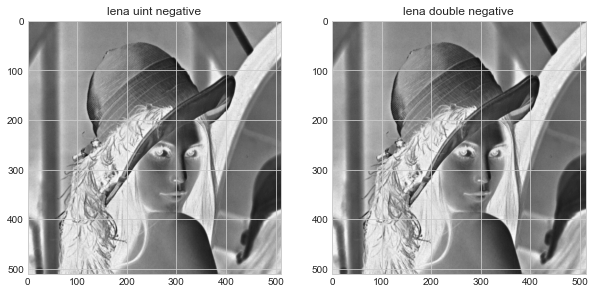

In [151]:
lena_int, lena_double = get_images()

#negative on lena int and double
lena_int = 255 - lena_int
lena_double = 1 - lena_double

cv.imwrite("outputs/lena_negative.png", lena_int)

lenas = plt.subplots(1, 2, figsize=(10, 5))
lenas[1][0].imshow(lena_int, cmap="gray")
lenas[1][0].set_title("lena uint negative")
lenas[1][1].imshow(lena_double, cmap="gray")
lenas[1][1].set_title("lena double negative")

Text(0.5, 1.0, 'lena double posterisation')

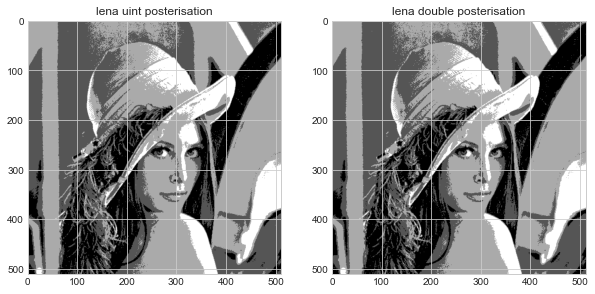

In [152]:
lena_int, lena_double = get_images()

#posterisation on lena int and double
lena_int = lena_int // 64 * 64
lena_double = lena_double // 0.25 * 0.25

cv.imwrite("outputs/lena_posterisation.png", lena_int)

lenas = plt.subplots(1, 2, figsize=(10, 5))
lenas[1][0].imshow(lena_int, cmap="gray")
lenas[1][0].set_title("lena uint posterisation")
lenas[1][1].imshow(lena_double, cmap="gray")
lenas[1][1].set_title("lena double posterisation")

## Estudo dirigido 5
## Operações Diadicas

In [9]:
video = cv.VideoCapture("data/traffic_sequence.mpg")

In [8]:
#display the video
def show_video(video):
    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break
        cv.imshow("frame", frame)
        if cv.waitKey(1) & 0xFF == ord("q"):
            break
    video.release()
    cv.destroyAllWindows()

show_video(video)


In [10]:
#difference between two frames of the whole video and store it in a new video
frames = []

ret, frame1 = video.read()
while video.isOpened():
    ret, frame2 = video.read()
    if not ret:
        break
    diff = cv.absdiff(frame1, frame2)
    frames.append(diff)
    frame1 = frame2
    if cv.waitKey(1) & 0xFF == ord("q"):
        break

video.release()
cv.destroyAllWindows()

height, width, layers = frames[0].shape
fps = video.get(cv.CAP_PROP_FPS)
frame_count = video.get(cv.CAP_PROP_FRAME_COUNT)

video = cv.VideoWriter("outputs/traffic_sequence_diff.mpg", cv.VideoWriter_fourcc(*"mpg1"), fps, (width, height))

for frame in frames:
    video.write(frame)

video.release()
cv.destroyAllWindows()

In [12]:
video_diff = cv.VideoCapture("outputs/traffic_sequence_diff.mpg")
show_video(video_diff)

## Estudo dirigido 6
## Kernel

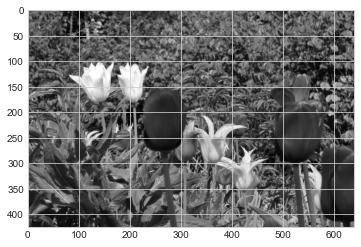

In [62]:
flowers = cv.imread("data/flowers4.png", cv.IMREAD_GRAYSCALE)
flowers = skimage.img_as_float(flowers)

plt.imshow(flowers, cmap="gray")

In [63]:
flowers.dtype

dtype('float64')

In [64]:
unit_kernel_15 = np.ones((15, 15)) / 225
# unit_kernel_15 = np.random.dirichlet(np.ones(15*15),size=1)
# unit_kernel_15 = unit_kernel_15.reshape(15, 15)

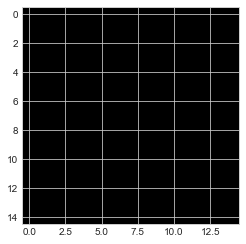

In [65]:
plt.imshow(unit_kernel_15, cmap="gray")

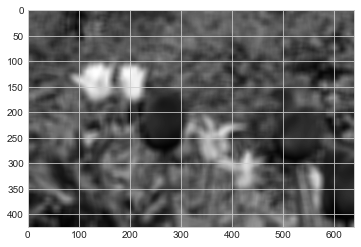

In [66]:
imU = cv.filter2D(flowers, -1, unit_kernel_15)
plt.imshow(imU, cmap="gray")

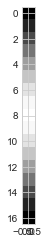

In [67]:
#get gaussian filter with sigma 5 and half width 8
gaussian_kernel_8 = cv.getGaussianKernel(17, 5)
plt.imshow(gaussian_kernel_8, cmap="gray")

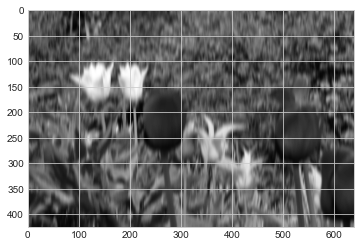

In [68]:
imG = cv.filter2D(flowers, -1, gaussian_kernel_8)
plt.imshow(imG, cmap="gray")

Text(0.5, 1.0, 'imG')

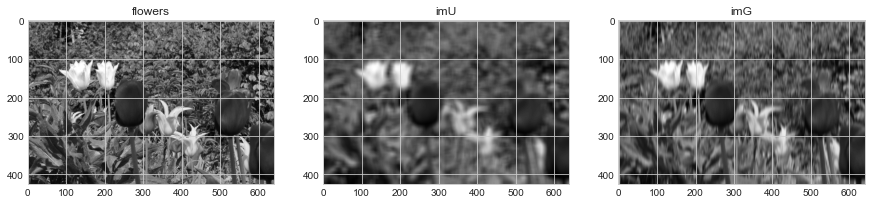

In [69]:
flowers_imU_imG = plt.subplots(1, 3, figsize=(15, 5))
flowers_imU_imG[1][0].imshow(flowers, cmap="gray")
flowers_imU_imG[1][0].set_title("flowers")
flowers_imU_imG[1][1].imshow(imU, cmap="gray")
flowers_imU_imG[1][1].set_title("imU")
flowers_imU_imG[1][2].imshow(imG, cmap="gray")
flowers_imU_imG[1][2].set_title("imG")

In [71]:
#save imu and img
cv.imwrite("outputs/flowers_imU.png", imU * 255)
cv.imwrite("outputs/flowers_imG.png", imG * 255)

True

## Estudo dirigido 7
## Classificação de cores

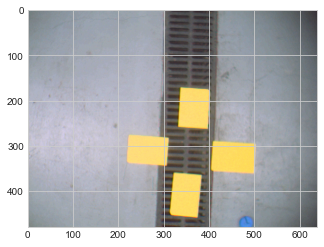

In [9]:
img = cv.imread("data/yellowtargets.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [10]:
from sklearn.cluster import KMeans

In [11]:
targets = img.copy().reshape(-1, 3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(targets)

In [12]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [13]:
center2 = targets.copy()
for i in range(len(targets)):
    targets[i] = centers[labels[i]]
    center2[i] = 0 if labels[i] != 2 else centers[labels[i]]

targets = targets.reshape(img.shape)
center2 = center2.reshape(img.shape)

#### Imagens e centros de clusters extraídos

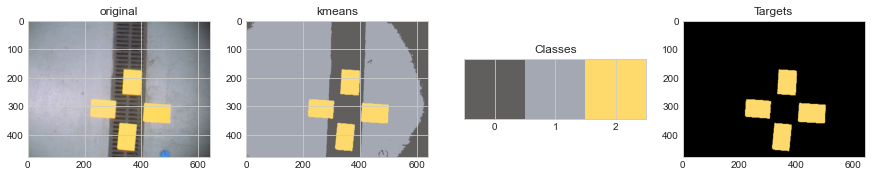

In [14]:
#plot 4 image side by side with the center of each cluster
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("original")
axs[1].imshow(targets)
axs[1].set_title("kmeans")
axs[2].imshow(centers.reshape(1, 3, 3) / 255)
axs[2].set_xticks([0,1,2])
axs[2].set_yticks([])
axs[2].set_title("Classes")
axs[3].imshow(center2)
axs[3].set_title("Targets")
plt.grid(False)
fig.savefig("outputs/yellowtargets_kmeans.png", pad_inches=0, facecolor="white")

#### Centros extraídos da imagem no plano de cromaticidade L*A*B*

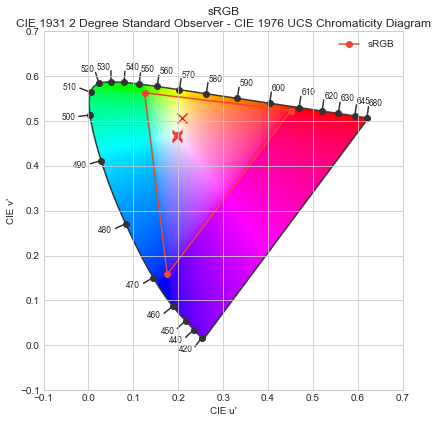

In [15]:
from colour.plotting import *

fig, axs = plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(centers, scatter_kwargs={"s": 100, "c": "red", "marker": "x"})
fig.savefig("outputs/chromaticity_diagram.png", facecolor="white")

## Estudo dirigido 8
## Momentos

In [73]:
img = np.genfromtxt("data/imagem.m", delimiter=";")

In [74]:
img = img.reshape(16,16)

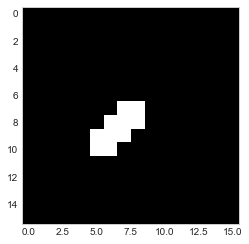

In [75]:
plt.imshow(img, cmap="gray")
plt.grid(False)

In [76]:
M = cv.moments(img)

cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
orientation = np.arctan2(2 * M["mu11"], M["mu20"] - M["mu02"]) / 2
lambda1 = (M["mu20"] + M["mu02"] + np.sqrt((M["mu20"] - M["mu02"])**2 + 4 * M["mu11"]**2)) / 2
lambda2 = (M["mu20"] + M["mu02"] - np.sqrt((M["mu20"] - M["mu02"])**2 + 4 * M["mu11"]**2)) / 2

#cv.ellipse(img, (cX, cY), (int(np.sqrt(lambda1)), int(np.sqrt(lambda2))), orientation * 180 / np.pi, 0, 360, 255, 2)

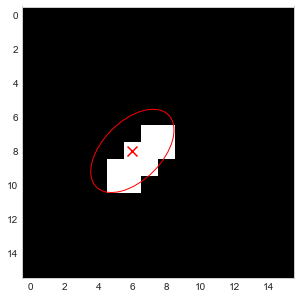

In [103]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img, cmap="gray")
ax.scatter(cX, cY, s=100, c="red", marker="x", label="Centroid")
#plot elipse
ax.add_patch(Ellipse((cX, cY), np.sqrt(lambda1*2), np.sqrt(lambda2*4), orientation * 180 / np.pi, fill=False, color="red", label="Elipse"))
plt.grid(False)
plt.savefig("outputs/ellipse.png", facecolor="white")

In [100]:
orientation

-0.78539816339744828

## Estudo dirigido 9
## Transformada de Hough

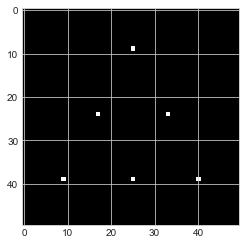

In [241]:
img = cv.imread("data/piramide.png")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

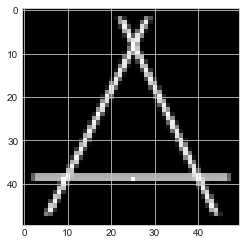

In [242]:
import math
lines = cv.HoughLines(img, rho = 1, theta = 1*np.pi/180, threshold = 2);

for line in lines:
    rho = line[0][0]
    theta = line[0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(img, pt1, pt2, (255,0,0), 1, cv.LINE_AA)

plt.imshow(img, cmap="gray")
plt.savefig("outputs/houghlines.png", facecolor="white")
